## Abaqus simulation 

This Jupyter notebook implements Artificial Neural Networks (ANNs) using the TensorFlow library to predict target variables from a simulation-derived dataset. Multiple ANN architectures were systematically trained by varying the number of hidden layers, neurons per layer, and training epochs to evaluate their impact on predictive accuracy. Performance was assessed using metrics such as R², MSE, and MAE to identify optimal network configurations. The notebook facilitates a detailed exploration of ANN-based modeling for biomedical data analysis.


In [28]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.losses import Huber

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_excel('combined_data_all.xlsx')


In [4]:
df.columns

Index(['Days', 'YMRoM', 'MSC', 'FB', 'CC', 'OB', 'GT', 'FT', 'CT', 'BT',
       'Modulus'],
      dtype='object')

In [5]:
df.head()

,Days,YMRoM,MSC,FB,CC,OB,GT,FT,CT,BT,Modulus
0,1,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
1,2,0.199860,0.294718,0.003749,0.010867,0.136919,0.985015,0.000750,0.000543,0.013692,5
2,3,0.360032,0.246635,0.007463,0.021193,0.262567,0.957368,0.002158,0.001580,0.038894,5
3,4,1.219640,0.204900,0.010148,0.031118,0.364455,0.922780,0.003828,0.003078,0.070314,5
4,5,2.872655,0.181334,0.010867,0.040671,0.417484,0.903238,0.004496,0.004825,0.087441,5


In [6]:
df.isnull().sum()

Days       0
YMRoM      0
MSC        0
FB         0
CC         0
OB         0
GT         0
FT         0
CT         0
BT         0
Modulus    0
dtype: int64

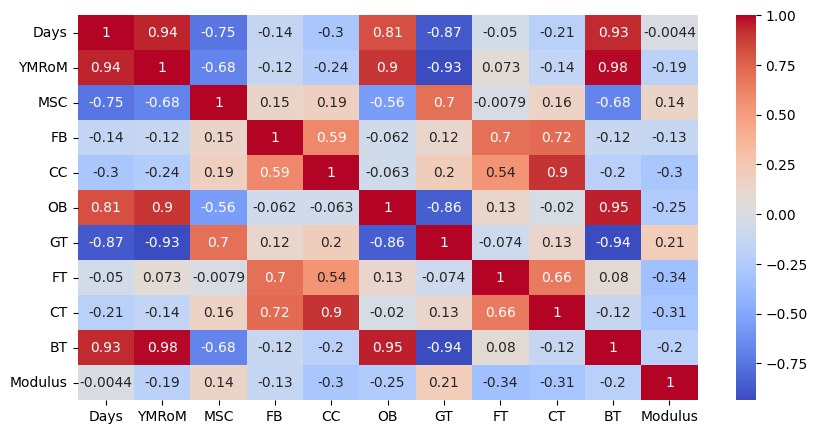

In [7]:
# making the heatmap of the correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=False)
plt.show()

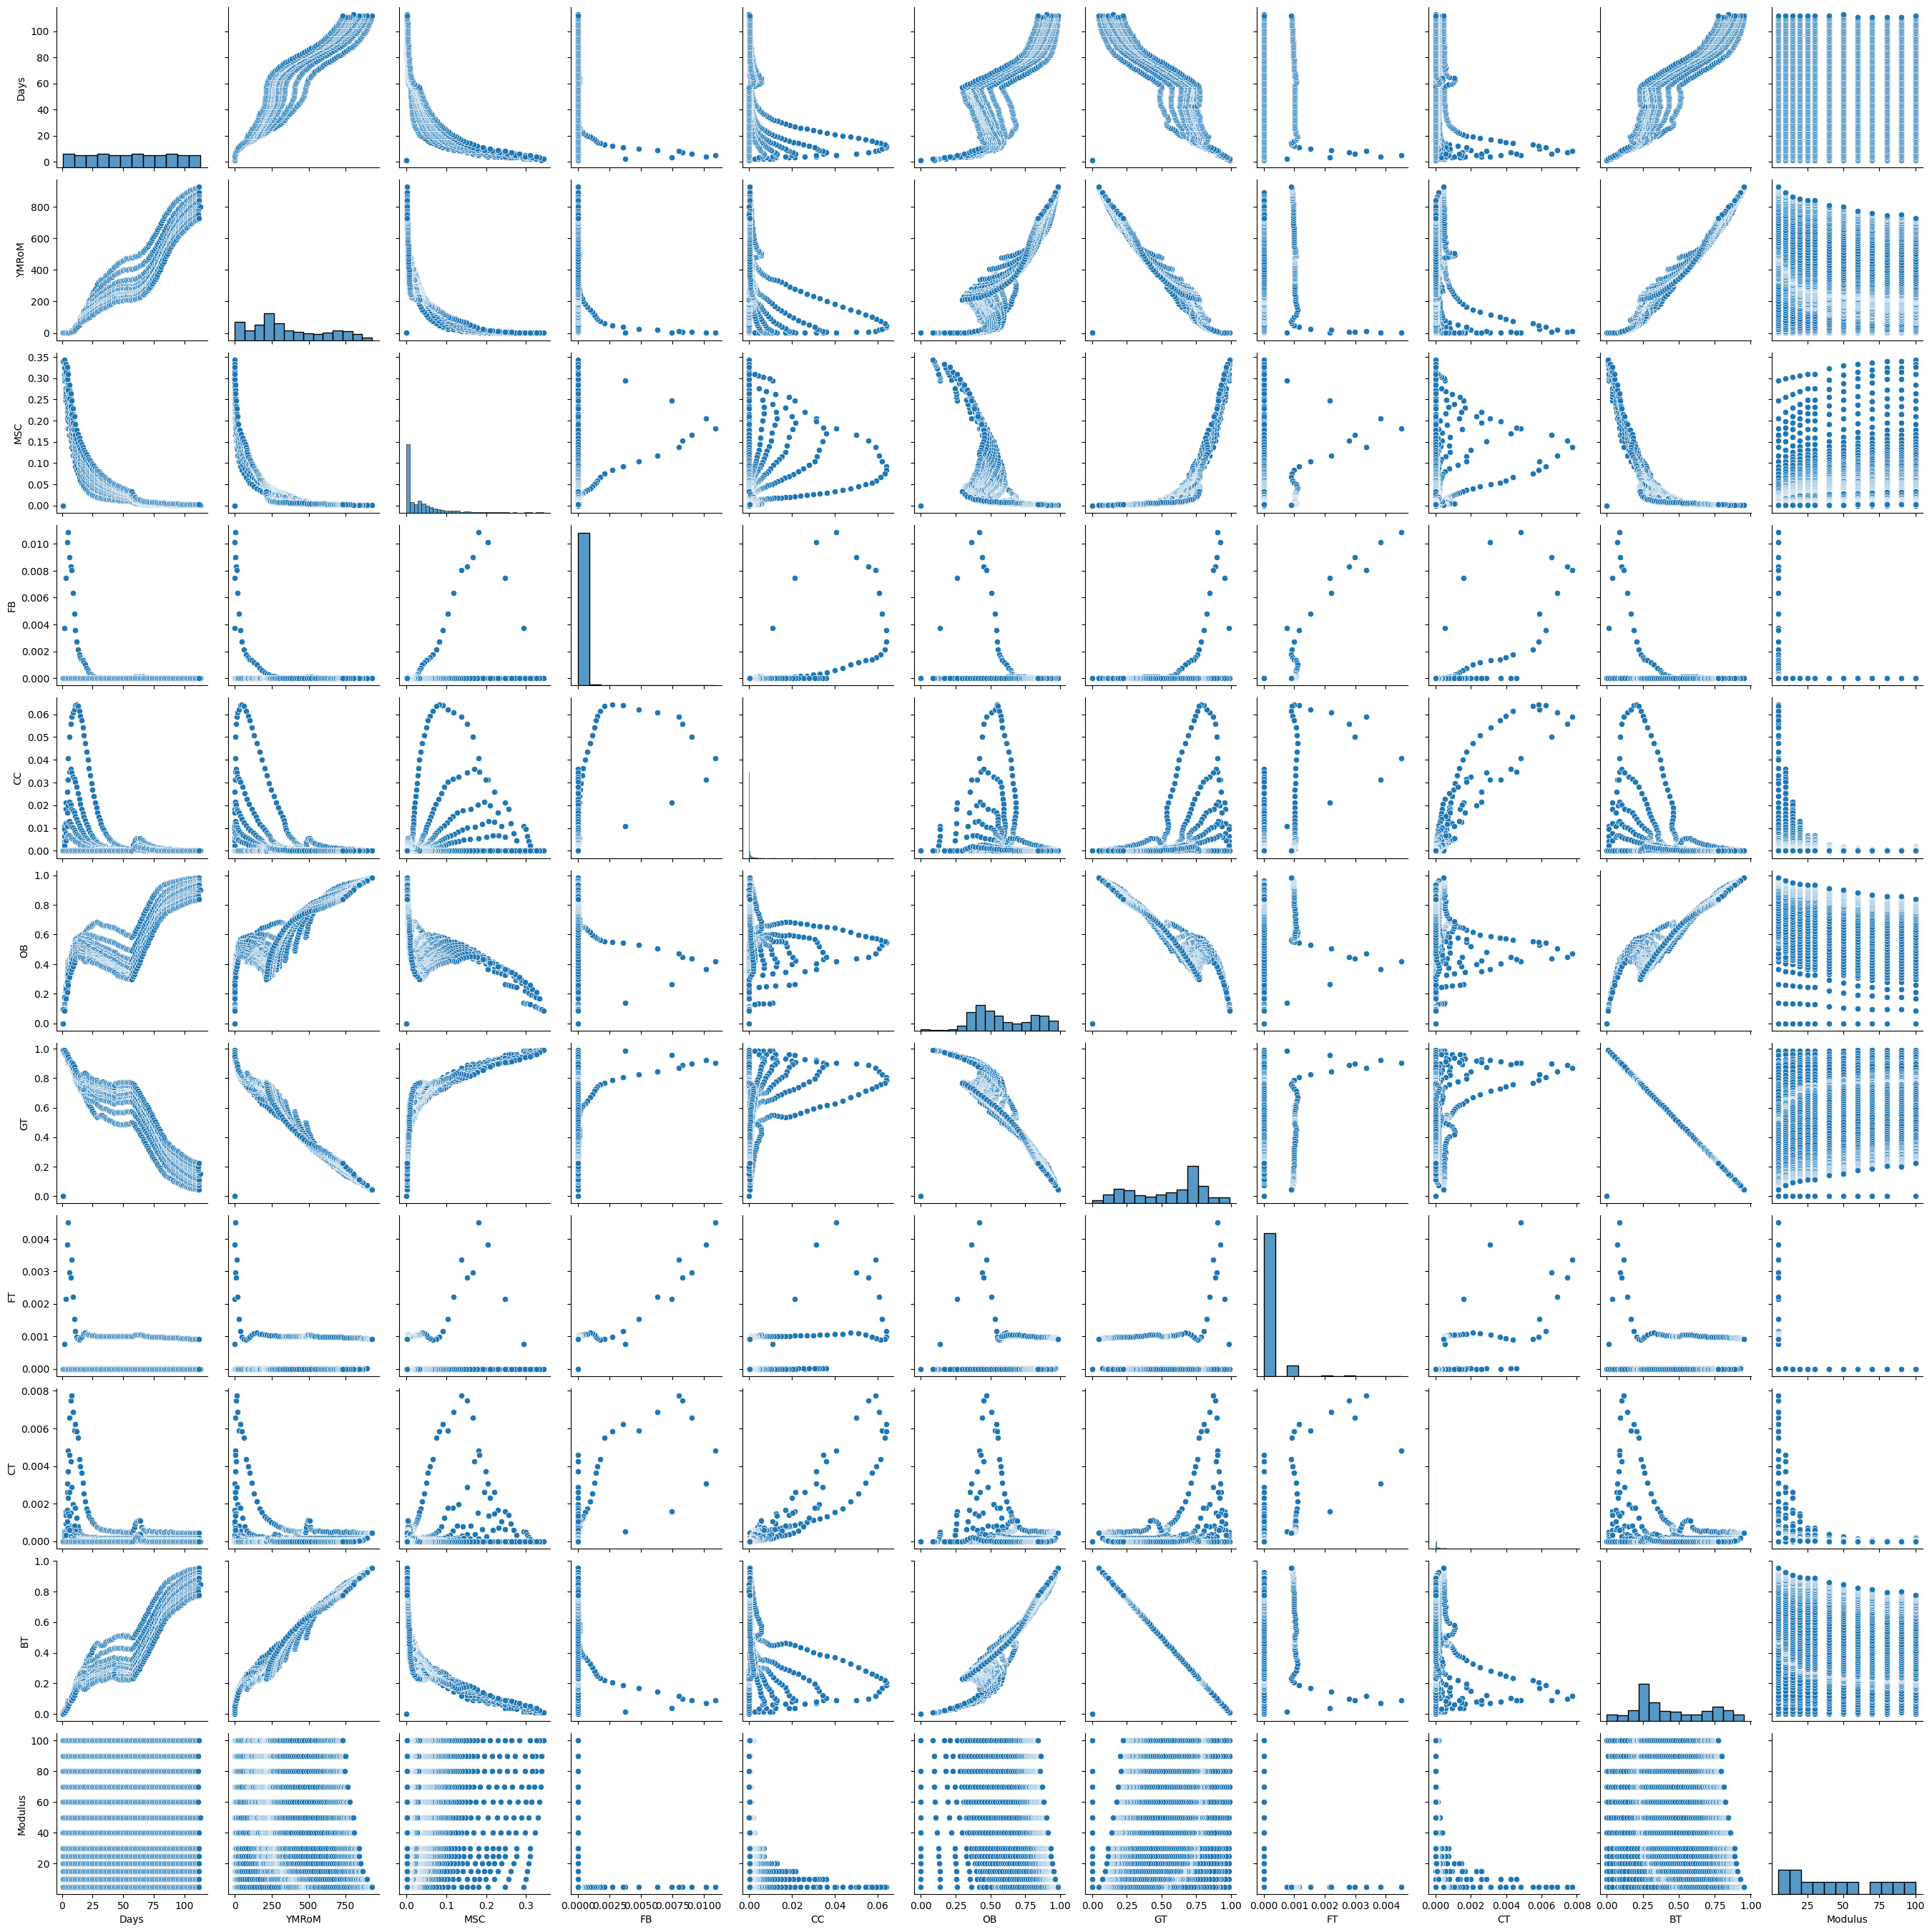

In [8]:
# making the pairplot of the data
sns.pairplot(df)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Days     1453 non-null   int64  
 1   YMRoM    1453 non-null   float64
 2   MSC      1453 non-null   float64
 3   FB       1453 non-null   float64
 4   CC       1453 non-null   float64
 5   OB       1453 non-null   float64
 6   GT       1453 non-null   float64
 7   FT       1453 non-null   float64
 8   CT       1453 non-null   float64
 9   BT       1453 non-null   float64
 10  Modulus  1453 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 125.0 KB


In [10]:
X = df.drop(['Days', 'YMRoM', 'Modulus'], axis=1)
y = df[['Days', 'YMRoM', 'Modulus']]

In [11]:
X.head()

,MSC,FB,CC,OB,GT,FT,CT,BT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.294718,0.003749,0.010867,0.136919,0.985015,0.000750,0.000543,0.013692
2,0.246635,0.007463,0.021193,0.262567,0.957368,0.002158,0.001580,0.038894
3,0.204900,0.010148,0.031118,0.364455,0.922780,0.003828,0.003078,0.070314
4,0.181334,0.010867,0.040671,0.417484,0.903238,0.004496,0.004825,0.087441


In [12]:
y.head()

,Days,YMRoM,Modulus
0,1,0.200000,5
1,2,0.199860,5
2,3,0.360032,5
3,4,1.219640,5
4,5,2.872655,5


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1162, 8), (291, 8), (1162, 3), (291, 3))

In [15]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [16]:
y_train.isnull().sum()

Days       0
YMRoM      0
Modulus    0
dtype: int64

In [17]:
# def create_model(neurons = 32, layers = 1):
#     model = Sequential()
#     model.add(Input(shape=(X_train.shape[1],)))
#     model.add(Dense(neurons, activation='relu'))

#     for i in range(layers - 1):
#         model.add(Dense(neurons, activation='relu'))
#         # model.add(Dropout(0.2))

#     model.add(Dense(3, activation='linear'))

#     model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
#     return model

# model = KerasRegressor(layers = 1, neurons = 32, build_fn=create_model, verbose=1)

# param_grid = {
#     'layers': [1, 2, 3, 4, 5, 6],
#     'neurons': [16, 32, 64, 128, 256, 512],
#     # 'batch_size' : [16, 32, 64],
#     # 'epochs' : [50, 100, 200]
# }

# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

# print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

In [47]:
model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        # # Dropout(0.2),
        Dense(512, activation='relu'),
        # Dense(64, activation='relu'),
        Dense(3)
])
model.compile(optimizer='adam', loss=Huber(delta=1.0), metrics=['mae'])

In [48]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056,771 (4.03 MB)

 Trainable params: 1,056,771 (4.03 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2063 - mae: 3.6384 - val_loss: 3.5267 - val_mae: 3.9666
Epoch 2/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4103 - mae: 2.8176 - val_loss: 3.6355 - val_mae: 4.0561
Epoch 3/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8386 - mae: 3.2585 - val_loss: 1.8954 - val_mae: 2.3097
Epoch 4/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9850 - mae: 2.3986 - val_loss: 4.4077 - val_mae: 4.8511
Epoch 5/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6453 - mae: 4.0781 - val_loss: 2.9681 - val_mae: 3.3926
Epoch 6/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2004 - mae: 2.6083 - val_loss: 3.3398 - val_mae: 3.7662
Epoch 7/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0310 - mae: 3.4576 - val_loss: 11.1522 - val_mae: 11.6230
Epoch 8/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.0691 - mae: 15.5439 - val_loss: 5.3571 - val_mae: 5.8190
Epoch 9/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

In [53]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [54]:
print(mean_squared_error(y_test, y_pred)),
print(mean_absolute_error(y_test, y_pred)),
print(r2_score(y_test, y_pred))

39.60364986651181
3.249775555525391
0.9670539498329163


In [57]:
y_test

,Days,YMRoM,Modulus
792,9,16.711626,50
1125,7,5.922638,80
998,102,720.629073,60
727,56,253.710507,40
529,82,510.583020,25
...,...,...,...
1033,26,140.080686,70
1327,98,666.902675,90
1409,69,265.338898,100
915,19,109.564616,60


In [56]:
difference = pd.DataFrame({
    'Actual Days': y_test.to_numpy()[:,0],
    'Predicted Days': y_pred[:,0],
    'Difference Days': y_test.to_numpy()[:,0] - y_pred[:,0],
    'Actual YMRoM': y_test.to_numpy()[:,1],
    'Predicted YMRoM': y_pred[:,1],
    'Difference YMRoM': y_test.to_numpy()[:,1] - y_pred[:,1],
    'Actual Young Modulus': y_test.to_numpy()[:,2],
    'Predicted Young Modulus': y_pred[:,2],
    'Difference Young Modulus': y_test.to_numpy()[:,2] - y_pred[:,2]
})

difference.to_excel('Difference in Days and Young Modulus Decision Tree.xlsx', index=False)